#Graphs for CAD people to make decisions and maybe for documentation

These graphs demonstrate the functionality of the model and hopefully provide some insight into what the graphs represent. In general, I have tried to comment the code to make it readable, but ask if there's anything thats confusing.

To see the graphs at a higher resolution, to read them better or for screenshots for the development log, replace the ```%matplotlib inline``` with ```matplotlib qt```

This notebook should be in the same folder as launcher.py, but there is another avaliable [here](https://github.com/mkf1g21/launcher) that has all the code included at the top if that doesn't work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import launcher
l=launcher.Launcher()


## Exit velocity against relaxed length of cord

This graph shows that even with pessimistic assumptions (300g cart, 50% efficiency), 8.5 m/s is achievable. This graph **assumes the arms on the launcher are 1.1x the length of the elastic at rest**. by varying the values in the for loop, other cart displacements/power settings can be tried.

A lower length ratio corresponds to shorter arms, and has the effect of making the gradient more negative throughout the length of the graph

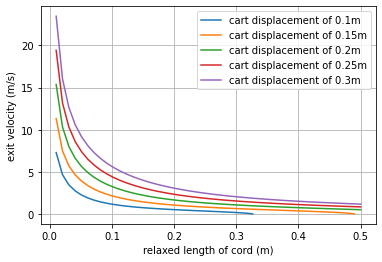

In [23]:
%%capture --no-display
%matplotlib inline
plt.figure(1)
plt.clf()

length_ratio = 1.1

relaxeds = np.linspace(0,0.5)

for displacement in [0.1,0.15,0.2,0.25,0.3]: #power settings
    velocities = [l.bow_exit_velocity(displacement, length_ratio * relaxed, relaxed, 2 * 20/relaxed, 0.3,0.5) for relaxed in relaxeds]
    plt.plot(relaxeds, velocities, label="cart displacement of " + str(displacement) + "m")
plt.xlabel("relaxed length of cord (m)")
plt.ylabel("exit velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

With a more realistic set of values, 100g cart and 80% efficiency, we can use less displacement to get the same range, staying better within the elastic range of the cord and increasing precision, because of the lower gradient of the line

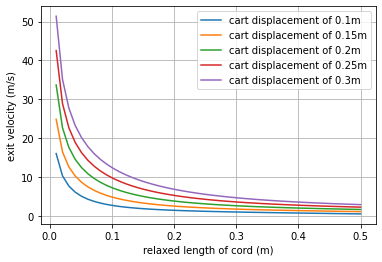

In [24]:
%%capture --no-display
%matplotlib inline
plt.figure(1)
plt.clf()

length_ratio = 1.1

relaxeds = np.linspace(0,0.5)

for displacement in [0.1,0.15,0.2,0.25,0.3]: #power settings
    velocities = [l.bow_exit_velocity(displacement, length_ratio * relaxed, relaxed, 2 * 20/relaxed, 0.1,0.8) for relaxed in relaxeds]
    plt.plot(relaxeds, velocities, label="cart displacement of " + str(displacement) + "m")
plt.xlabel("relaxed length of cord (m)")
plt.ylabel("exit velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

At an exit velocity of 8.5, every distance is well within reach, but precision will be low

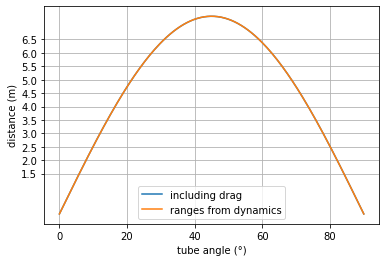

In [4]:
%matplotlib inline
l.set_angles(8.5,0)
l.plot_angle_v_range()

Graph demonstrating the different launch velocities and their maximum range. For the region we are interested in (2 - 6 meters) the line can probably be approximated to be linear. The 40° line isn't visible because the 50° line covers it.

In [30]:
%matplotlib inline
plt.figure(2)
plt.clf()
l.set_angles(0,45)

velocities = np.linspace(0.1,10)

for angle in [30,35,40,45,50]:
    ranges = [l.get_range_drag(mag=velocity, theta = np.radians(angle)) for velocity in velocities]
    plt.plot(velocities, ranges, label="range at an angle of " + str(angle)+ "°")

plt.xlabel("launch velocity (m/s)")
plt.ylabel("distance (m)")
plt.legend()
plt.show()

